<a href="https://colab.research.google.com/github/MatthewMoor/SOM-2.5PM/blob/master/SOMv9_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import somoclu
import math as mt
%matplotlib inline

In [55]:
data_bei = pd.read_csv('BeijingPM2.csv')
data_chen = pd.read_csv('ChengduPM20.csv')
data_guan = pd.read_csv('GuangzhouPM20.csv')
data_shan = pd.read_csv('ShanghaiPM20.csv')
data_shen = pd.read_csv('ShenyangPM20.csv')

datasets = [
    
    data_bei,
    data_chen,
    data_guan,
    data_shan,
    data_shen,
    
]

In [66]:
dataset = data_bei
hours = 0
point = 0
for j in range(dataset.shape[0]):
    dataset['day'][j] = np.float32(point)
    hours += 1
    if hours == 24:
        point += 1
        hours = 0
    if point == 365:
        hours = 0
        point = 0

/home/valyay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [67]:
print(dataset)

          No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0          1  2010      1    0     0       4        NaN            NaN   
1          2  2010      1    0     1       4        NaN            NaN   
2          3  2010      1    0     2       4        NaN            NaN   
3          4  2010      1    0     3       4        NaN            NaN   
4          5  2010      1    0     4       4        NaN            NaN   
5          6  2010      1    0     5       4        NaN            NaN   
6          7  2010      1    0     6       4        NaN            NaN   
7          8  2010      1    0     7       4        NaN            NaN   
8          9  2010      1    0     8       4        NaN            NaN   
9         10  2010      1    0     9       4        NaN            NaN   
10        11  2010      1    0    10       4        NaN            NaN   
11        12  2010      1    0    11       4        NaN            NaN   
12        13  2010      1    0    12  

In [69]:
dataset.to_csv("dataset1.csv")

In [103]:
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')
dataset4 = pd.read_csv('dataset4.csv')
dataset5 = pd.read_csv('dataset5.csv')

datasets = [
    dataset1,
    dataset2,
    dataset3,
    dataset4,
    dataset5,
]
# describes our datasets
for i, u in enumerate(datasets):
    datasets[i] = u.dropna()
        
for i, data in enumerate(datasets):
    pollution_first = data.iloc[:, 7]
    pollution_second = data.iloc[:, 8]
    pollution_third = data.iloc[:, 9]
    PM = data.iloc[:, 7:9]
    
    if i == 0:
        pollution_fourth = data.iloc[:, 10]
        common_polution = (pollution_first + pollution_second + pollution_third + pollution_fourth) / 4
    else:
        common_polution = (pollution_first + pollution_second + pollution_third) / 3
        
    del datasets[i]['cbwd']
    del datasets[i]['No']
    del datasets[i]['month']
    del datasets[i]['year']
    del datasets[i]['season']
    del datasets[i]['Unnamed: 0']
    datasets[i]['average_PM'] = common_polution

for i, data in enumerate(datasets):
    if i == 0:
        datasets[i] = data.drop(data.columns[[2, 3, 4, 5]], axis=1)
    else:
        datasets[i] = data.drop(data.columns[[2, 3, 4]], axis=1)
union = pd.concat(datasets, ignore_index=True)
labels = range(100685)


/home/valyay/.local/lib/python3.5/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[       day  hour  DEWP  HUMI    PRES  TEMP    Iws  precipitation  Iprec  \
27824   64     8  -6.0  59.0  1019.0   1.0   0.89            0.0    0.0   
27825   64     9  -8.0  38.0  1019.0   5.0   1.78            0.0    0.0   
27826   64    10  -8.0  31.0  1018.0   8.0   2.67            0.0    0.0   
27828   64    12  -9.0  23.0  1017.0  11.0   4.45            0.0    0.0   
27829   64    13  -9.0  22.0  1015.0  12.0   5.34            0.0    0.0   
27830   64    14 -10.0  19.0  1014.0  13.0   7.13            0.0    0.0   
27831   64    15  -9.0  19.0  1013.0  14.0   3.13            0.0    0.0   
27832   64    16  -9.0  19.0  1013.0  14.0   4.92            0.0    0.0   
27833   64    17  -8.0  23.0  1013.0  12.0   1.79            0.0    0.0   
27834   64    18  -7.0  33.0  1013.0   8.0   0.45            0.0    0.0   
27835   64    19  -6.0  44.0  1014.0   5.0   1.34            0.0    0.0   
27836   64    20  -7.0  38.0  1014.0   6.0   2.23            0.0    0.0   
27837   64    21  -6.0  

[       day  hour  DEWP  HUMI    PRES  TEMP    Iws  precipitation  Iprec  \
27824   64     8  -6.0  59.0  1019.0   1.0   0.89            0.0    0.0   
27825   64     9  -8.0  38.0  1019.0   5.0   1.78            0.0    0.0   
27826   64    10  -8.0  31.0  1018.0   8.0   2.67            0.0    0.0   
27828   64    12  -9.0  23.0  1017.0  11.0   4.45            0.0    0.0   
27829   64    13  -9.0  22.0  1015.0  12.0   5.34            0.0    0.0   
27830   64    14 -10.0  19.0  1014.0  13.0   7.13            0.0    0.0   
27831   64    15  -9.0  19.0  1013.0  14.0   3.13            0.0    0.0   
27832   64    16  -9.0  19.0  1013.0  14.0   4.92            0.0    0.0   
27833   64    17  -8.0  23.0  1013.0  12.0   1.79            0.0    0.0   
27834   64    18  -7.0  33.0  1013.0   8.0   0.45            0.0    0.0   
27835   64    19  -6.0  44.0  1014.0   5.0   1.34            0.0    0.0   
27836   64    20  -7.0  38.0  1014.0   6.0   2.23            0.0    0.0   
27837   64    21  -6.0  

In [105]:
union.to_csv("Union.csv")

In [104]:
print(union)

        day  hour  DEWP   HUMI    PRES  TEMP    Iws  precipitation  Iprec  \
0        64     8  -6.0  59.00  1019.0   1.0   0.89            0.0    0.0   
1        64     9  -8.0  38.00  1019.0   5.0   1.78            0.0    0.0   
2        64    10  -8.0  31.00  1018.0   8.0   2.67            0.0    0.0   
3        64    12  -9.0  23.00  1017.0  11.0   4.45            0.0    0.0   
4        64    13  -9.0  22.00  1015.0  12.0   5.34            0.0    0.0   
5        64    14 -10.0  19.00  1014.0  13.0   7.13            0.0    0.0   
6        64    15  -9.0  19.00  1013.0  14.0   3.13            0.0    0.0   
7        64    16  -9.0  19.00  1013.0  14.0   4.92            0.0    0.0   
8        64    17  -8.0  23.00  1013.0  12.0   1.79            0.0    0.0   
9        64    18  -7.0  33.00  1013.0   8.0   0.45            0.0    0.0   
10       64    19  -6.0  44.00  1014.0   5.0   1.34            0.0    0.0   
11       64    20  -7.0  38.00  1014.0   6.0   2.23            0.0    0.0   

In [0]:
# Here we`ve change first 10
import random as rd
for i in range(10**4):
    union["TEMP"][i] = float(rd.randrange(90, 120))
print(union)

/home/matth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


        year  month  day  hour  season  DEWP   HUMI    PRES   TEMP    Iws  \
0       2013      3    5     8     1.0  -6.0  59.00  1019.0  100.0   0.89   
1       2013      3    5     9     1.0  -8.0  38.00  1019.0  108.0   1.78   
2       2013      3    5    10     1.0  -8.0  31.00  1018.0   96.0   2.67   
3       2013      3    5    12     1.0  -9.0  23.00  1017.0  104.0   4.45   
4       2013      3    5    13     1.0  -9.0  22.00  1015.0  118.0   5.34   
5       2013      3    5    14     1.0 -10.0  19.00  1014.0  107.0   7.13   
6       2013      3    5    15     1.0  -9.0  19.00  1013.0  110.0   3.13   
7       2013      3    5    16     1.0  -9.0  19.00  1013.0   97.0   4.92   
8       2013      3    5    17     1.0  -8.0  23.00  1013.0  102.0   1.79   
9       2013      3    5    18     1.0  -7.0  33.00  1013.0  109.0   0.45   
10      2013      3    5    19     1.0  -6.0  44.00  1014.0  102.0   1.34   
11      2013      3    5    20     1.0  -7.0  38.00  1014.0   93.0   2.23   

In [0]:
def data_transformation(data=None, default_data = True): 
  """Transform data in the range 0, 1"""
  if data is None and default_data == True:
    X = pd.read_csv('dust_calculation.csv')
    X = X.iloc[:, 1:]
  else:
    X = data

  from sklearn.preprocessing import MinMaxScaler
  sc = MinMaxScaler(feature_range = (0, 1))
  X = sc.fit_transform(X)
  print(np.shape(X))
  return X

def elbow_plot(X):
  """Draws plot with which we find the cluster"""
  Sum_of_squared_distances = []
  K = range(1,10)
  for k in K:
      km = KMeans(n_clusters=k).fit(X)
      km = km.fit(X)
      Sum_of_squared_distances.append(km.inertia_)

  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()
  
def draw_umatrix(labels=None):
  if labels != None:
    return som.view_umatrix(bestmatches=True, labels=labels), som.view_component_planes()
  else:
    return som.view_umatrix(bestmatches=True), som.view_component_planes()

def get_coordinates_from_index(n, x, y):
    if n < 0:
        return (-1, -1)
    else:
        return (n % y, n // y)


def get_index_from_coordinates(c, x, y):
    if c[0] < 0 or c[1] < 0 or c[0] > y or c[1] > x:
        return -1
    else:
        return c[1]*y + c[0]


def get_neighbors_from_index(n, x, y):
    c = get_coordinates_from_index(n, x, y)
    neighbors_c = [(c[0]-1, c[1]), (c[0]+1, c[1]),
                   (c[0], c[1]-1), (c[0], c[1]+1)]
    neighbors_c = [c for c in neighbors_c
                   if c[0] >= 0 and c[1] >= 0 and c[1] < x and c[0] < y]
    neighbors = [get_index_from_coordinates(c, x, y) for c in neighbors_c]
    return list(set(neighbors))


def calculate_topographical_error(som, n_rows, n_columns):
    surface_state = som.get_surface_state()
    bmus_1st_and_2nd = np.argsort(surface_state, axis=1)[:, :2]
    all_2nd = []
    for i, second_index in enumerate(bmus_1st_and_2nd[:, 1]):
        all_2nd.append([])
        distance = surface_state[i, second_index]
        for s_i, s in enumerate(surface_state[i]):
            if abs(s-distance) < 10e-5:
                all_2nd[-1].append(s_i)
    neighbors = [get_neighbors_from_index(t, n_rows, n_columns)
                 for t in bmus_1st_and_2nd[:, 0]]

    e_t = 1-np.mean([len(set(second) & set(neighs)) > 0 for (second, neighs) in
                     zip(all_2nd, neighbors)])
    return e_t

def find_clusters(labels):
  """We find line our clusters of datasets"""
  clusters = {}
  for k in labels:  # The data instance you are interested in 
      cluster = str(som.clusters[som.bmus[k, 1], som.bmus[k, 0]])
      if not cluster in clusters.keys():
          clusters[cluster] = []
      clusters[cluster] += [k]
  import json
  print(json.dumps(clusters, sort_keys=True, indent=4))
  return clusters
  
    
 
  
def cluster_data(number_cluster, clusters):
  """Pulling out data-points in rows"""
  try:
    pulled_data = []
    detailed_cluster = clusters[number_cluster]
    for i in detailed_cluster:
      pulled_data.append(X[i])
    quantity_strings = len(pulled_data)
  except KeyError:
    print('Your data out of range!\nSolution: Enter correct cluster value, your length dict - {}'.format(len(clusters.keys())))
  print("Quantity strings in clusters - {} \n Approximate map size - {} ".format(quantity_strings,mt.sqrt(5*mt.sqrt(quantity_strings))))
  return np.asarray(pulled_data)

 
def quant_err(data):
    bmu_dists = [] 
    bmus = som.get_bmus(som.get_surface_state(data))
    bmus_feat = som.codebook
    for index, input_vector in enumerate(data):
        bmu = bmus[index]
        bmu_feat = bmus_feat[bmu[0], bmu[1]]
        bmu_dists.append(np.linalg.norm(input_vector-bmu_feat))
    return np.array(bmu_dists).mean()

def cluster_quant_err(data):
    cluster_bmu_dists = []
    for index_cluster in clusters:
        data_cluster = cluster_data(index_cluster, clusters)
        error_certain_cluster = quant_err(data_cluster)
        cluster_bmu_dists.append([index_cluster, error_certain_cluster])
    return np.array(cluster_bmu_dists)


def cluster_data_frame(number_cluster, clusters):
    detailed_cluster = [i for i in clusters[number_cluster]]
    data_cluster = union.iloc[detailed_cluster]
    return data_cluster        

In [0]:
n_rows, n_columns = 40, 40
X = data_transformation(union)
labels = range(X.shape[0])

som = somoclu.Somoclu(n_columns, n_rows, data=X, maptype="planar", initialization="pca")
som.train(epochs=2,radius0=38, radiusN=1,radiuscooling="exponential",scale0=0.1, scaleN=0.03, scalecooling="exponential")
e_t = calculate_topographical_error(som, n_rows, n_columns)
print("The topographical error obtained is: %s"%e_t)

(100684, 13)
The topographical error obtained is: 0.44648603551706334


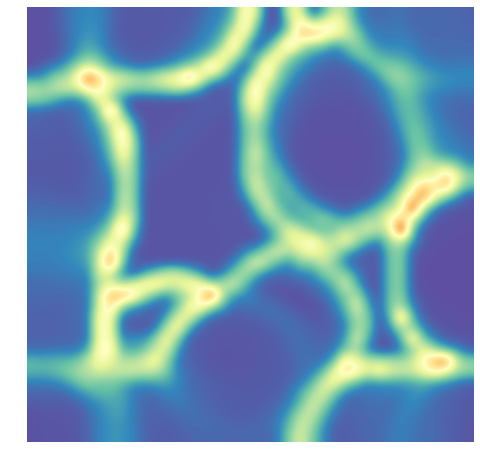

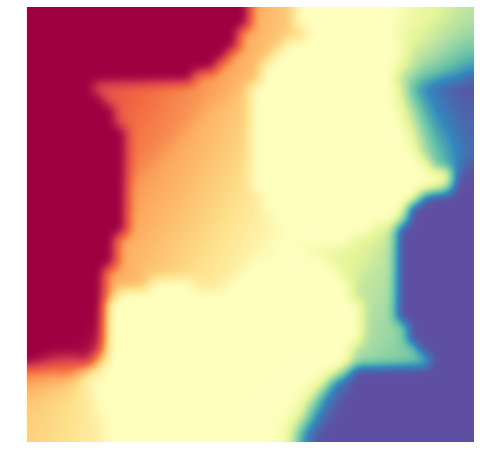

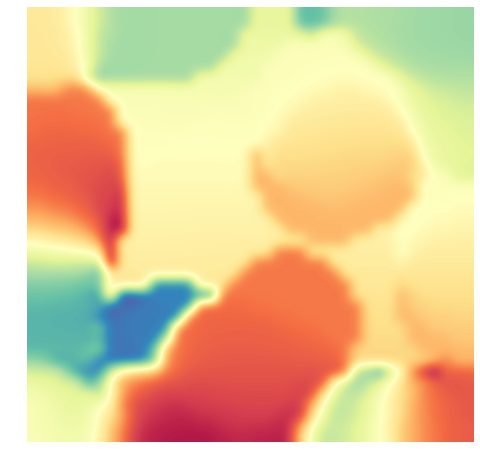

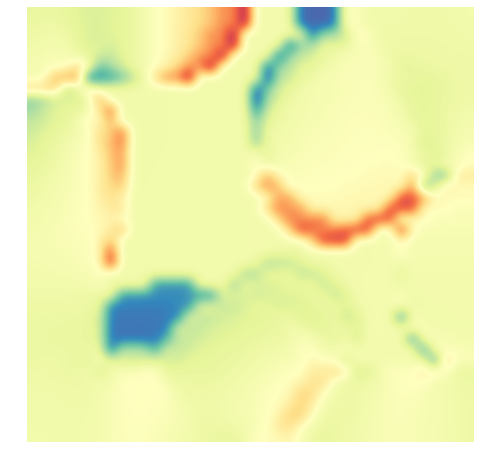

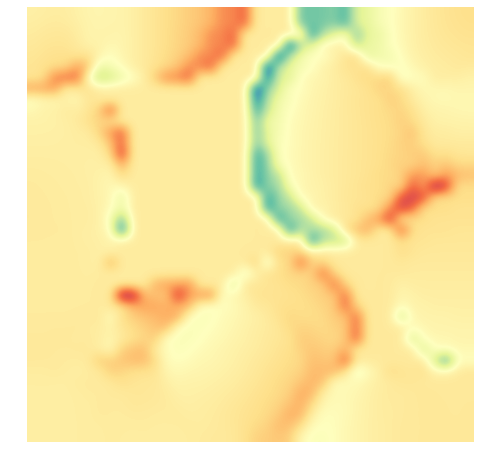

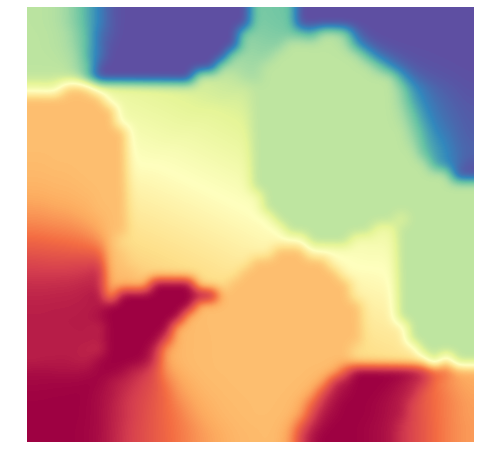

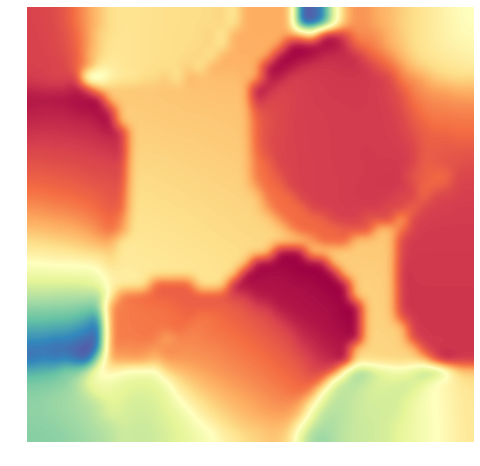

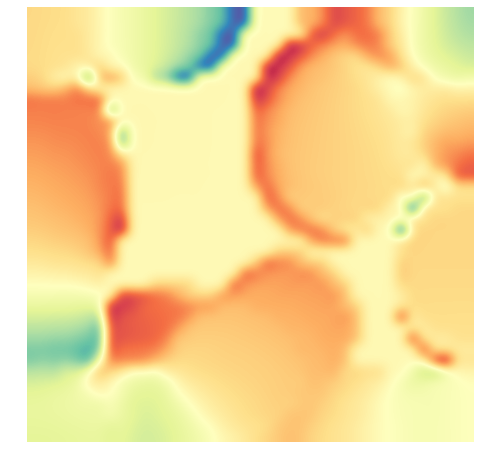

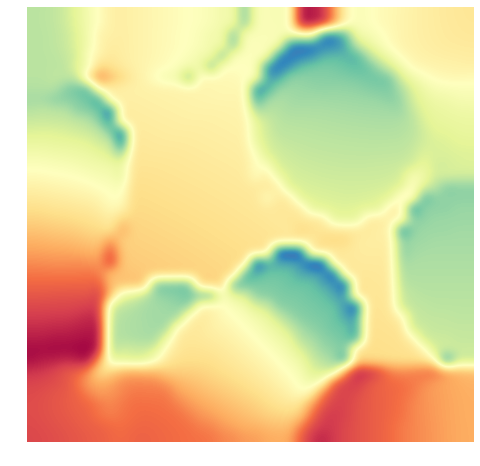

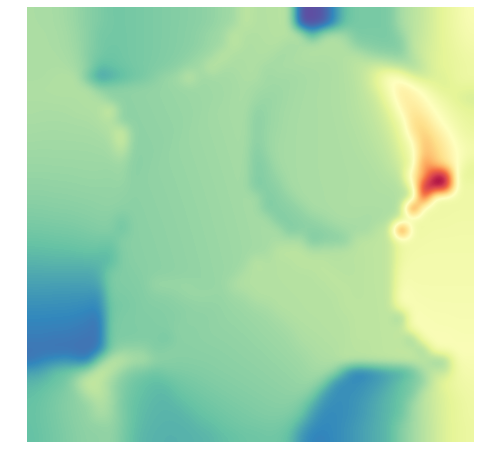

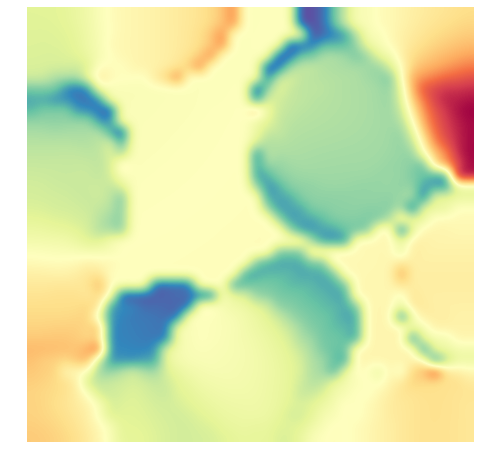

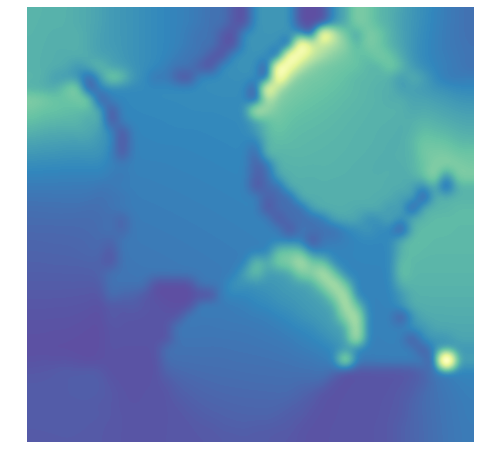

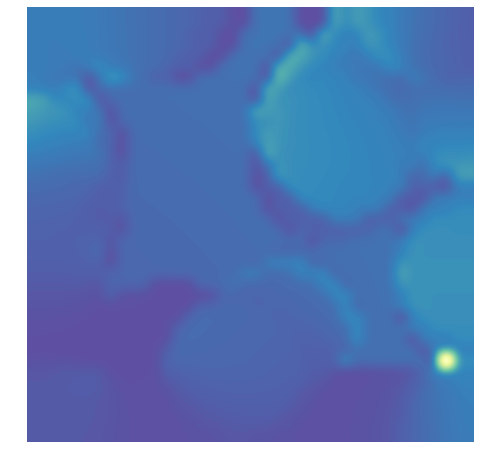

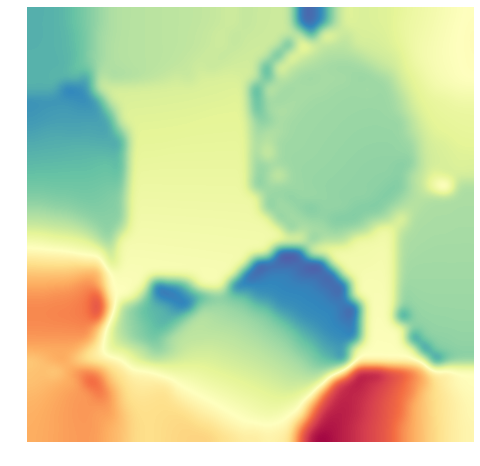

<module 'matplotlib.pyplot' from '/home/matth/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix()
som.view_component_planes()

In [0]:
%time som.train(epochs=10000,radius0=1,radiusN=0.000001,radiuscooling="exponential",scale0=0.035, scaleN=0.001, scalecooling="exponential")
e_t = calculate_topographical_error(som, n_rows, n_columns)
print("The topographical error obtained is: %s"%e_t)

CPU times: user 23h 18min 59s, sys: 45 s, total: 23h 19min 44s
Wall time: 5h 54min 32s
The topographical error obtained is: 0.5041118747765285


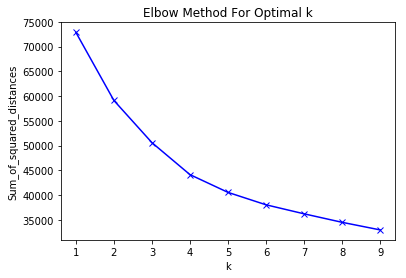

In [0]:
elbow_plot(X)

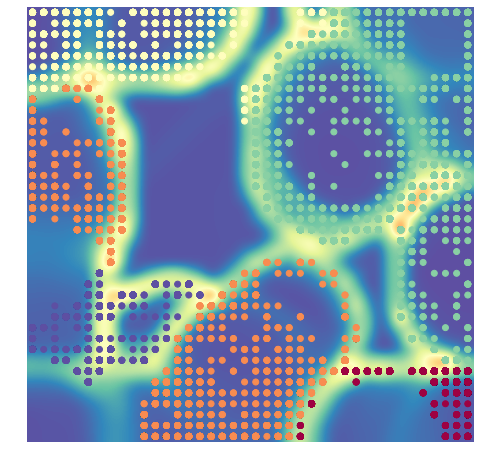

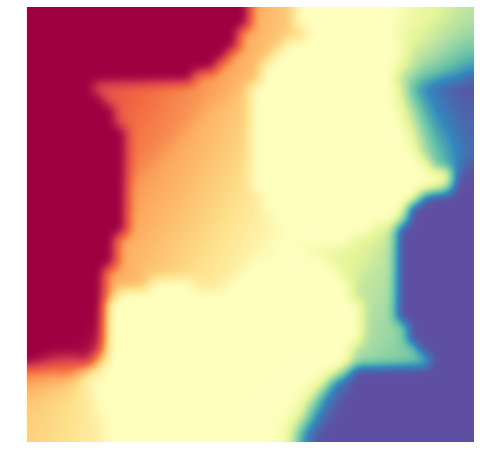

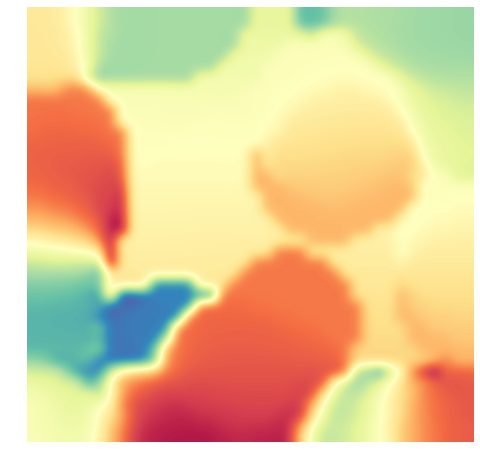

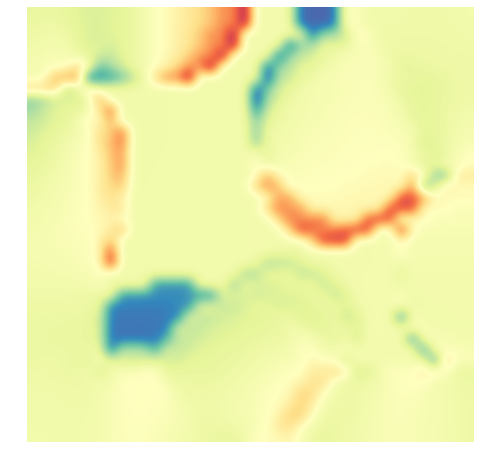

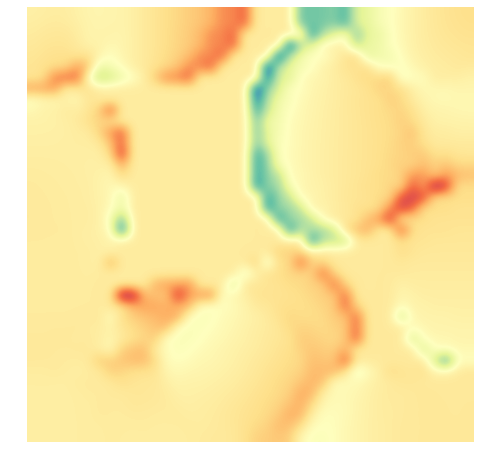

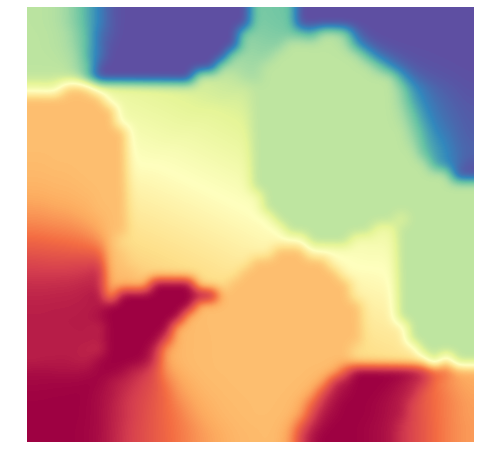

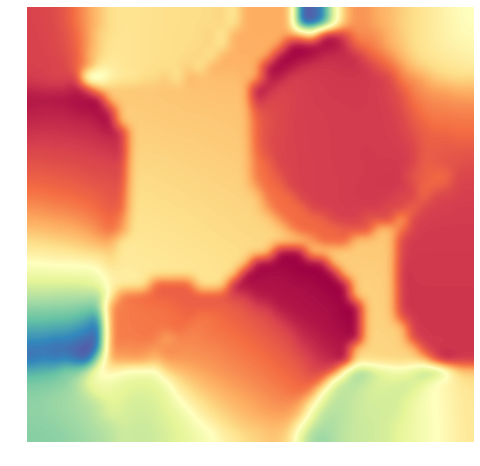

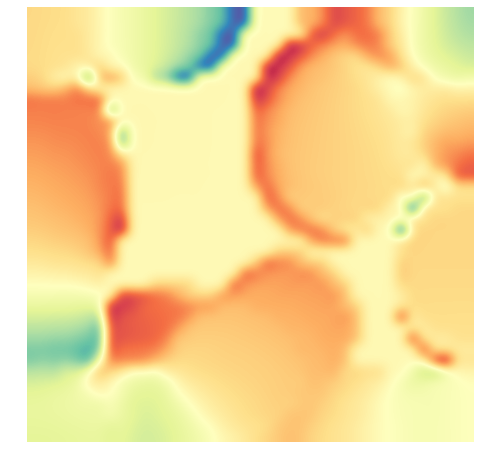

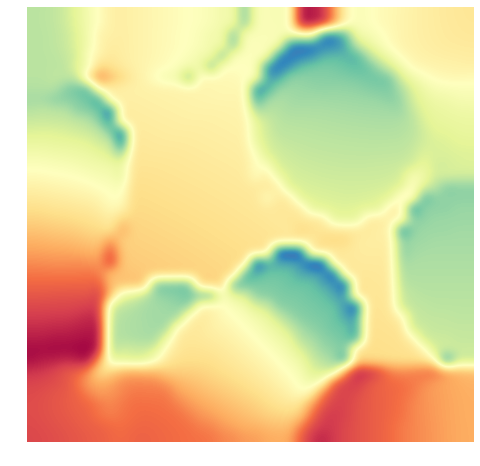

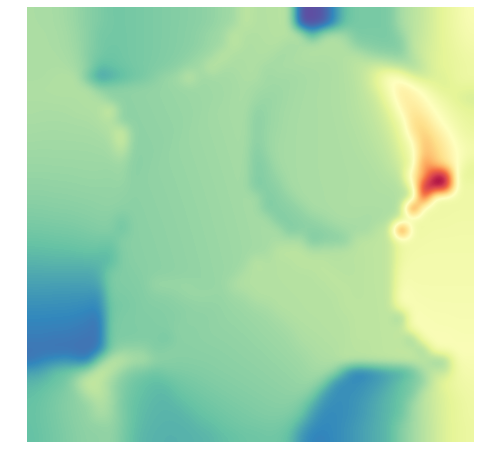

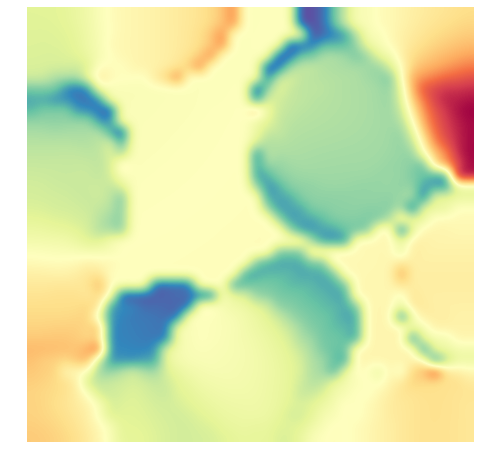

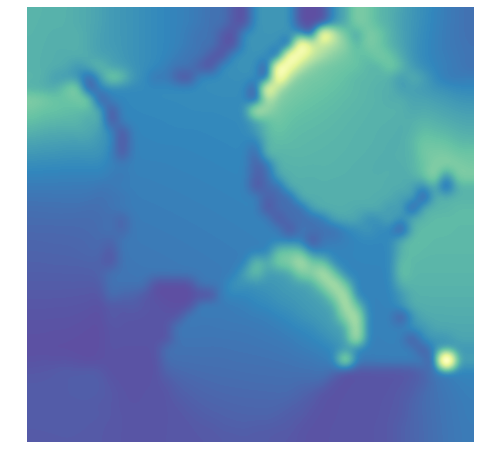

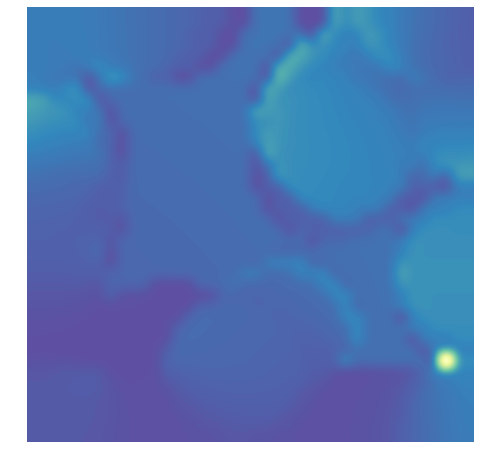

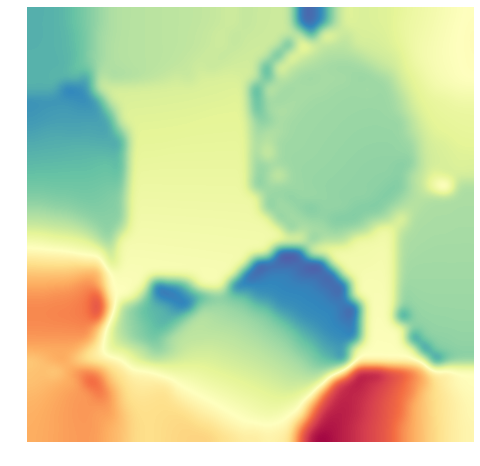

(<module 'matplotlib.pyplot' from '/home/matth/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/home/matth/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>)

In [0]:
algorithm = KMeans(n_clusters = 5)
som.cluster(algorithm=algorithm)
draw_umatrix()

In [0]:
# We find own data-points for each clusters
clusters = find_clusters(labels)

{
    "0": [
        6295,
        6296,
        6297,
        6298,
        6299,
        6300,
        6301,
        6302,
        6303,
        6304,
        6305,
        6306,
        6307,
        6308,
        6309,
        6310,
        6311,
        6312,
        6313,
        6314,
        6315,
        6316,
        6317,
        6318,
        6319,
        6320,
        6321,
        6322,
        6323,
        6324,
        6325,
        6326,
        6327,
        6328,
        6329,
        6330,
        6331,
        6332,
        6333,
        6334,
        6335,
        6336,
        6337,
        6338,
        6339,
        6340,
        6341,
        6342,
        6343,
        6344,
        6345,
        6346,
        6347,
        6348,
        6349,
        6350,
        6351,
        6352,
        6353,
        6354,
        6355,
        6356,
        6357,
        6358,
        6359,
        6360,
        6361,
        6362,
        6363,
        6364,
       

In [0]:
# calling DataFrame for all clusters
for i in range(len(clusters)):
    print("Cluster: {}".format(i))
    cluster_frame = cluster_data_frame(str(i), clusters)
    print(cluster_frame, "\n"*10)

Cluster: 0
       year  month  day  hour  season  DEWP   HUMI    PRES   TEMP     Iws  \
6295   2014      1    1     0     4.0 -20.0  12.00  1014.0   97.0  143.48   
6296   2014      1    1     1     4.0 -20.0  12.00  1013.0   97.0  147.50   
6297   2014      1    1     2     4.0 -20.0  13.00  1013.0   99.0  151.52   
6298   2014      1    1     3     4.0 -20.0  13.00  1013.0   99.0  153.31   
6299   2014      1    1     4     4.0 -18.0  19.00  1012.0  117.0    0.89   
6300   2014      1    1     5     4.0 -18.0  18.00  1012.0  105.0    4.02   
6301   2014      1    1     6     4.0 -19.0  14.00  1012.0  115.0    8.94   
6302   2014      1    1     7     4.0 -19.0  14.00  1013.0   93.0   16.09   
6303   2014      1    1     8     4.0 -18.0  15.00  1013.0   96.0   21.90   
6304   2014      1    1     9     4.0 -18.0  14.00  1014.0   98.0   26.82   
6305   2014      1    1    10     4.0 -18.0  13.00  1015.0  109.0   31.74   
6306   2014      1    1    11     4.0 -18.0  12.00  1015.0  108.0

In [0]:
quantization = cluster_quant_err(clusters)
print(quantization)

Quantity strings in clusters - 31980 
 Approximate map size - 29.902301563857463 
Quantity strings in clusters - 22041 
 Approximate map size - 27.24537725742694 
Quantity strings in clusters - 26133 
 Approximate map size - 28.430357400777087 
Quantity strings in clusters - 20530 
 Approximate map size - 26.76592394040011 
[['0' '0.6785322945452463']
 ['2' '1.022664948468382']
 ['1' '0.8131307675233925']
 ['3' '1.0871562402303068']]


In [0]:
specific_cluster = cluster_data('3', clusters)

Quantity strings in clusters - 16541 
 Approximate map size - 25.358609884270784 


In [0]:
n_rows, n_columns = 29, 29
som = somoclu.Somoclu(n_columns, n_rows, data=specific_cluster, maptype="toroid", initialization="pca")
%time som.train(epochs=1000,radius0=28, radiusN=1,radiuscooling="exponential",scale0=0.1, scaleN=0.035, scalecooling="exponential")

CPU times: user 16min 9s, sys: 814 ms, total: 16min 9s
Wall time: 4min 22s


In [0]:
%time som.train(epochs=10000,radius0=1,radiusN=0.000001,radiuscooling="exponential",scale0=0.035, scaleN=0.001, scalecooling="exponential")
e_t = calculate_topographical_error(som, n_rows, n_columns)
print("The topographical error obtained is: %s"%e_t)

CPU times: user 2h 22min 41s, sys: 10.5 s, total: 2h 22min 52s
Wall time: 38min 37s
The topographical error obtained is: 0.5026902847469923


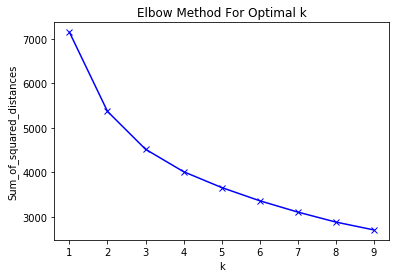

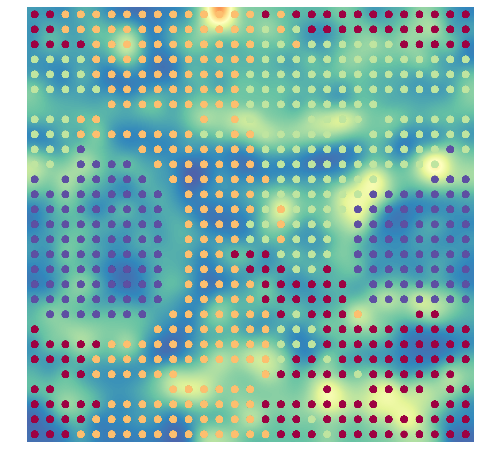

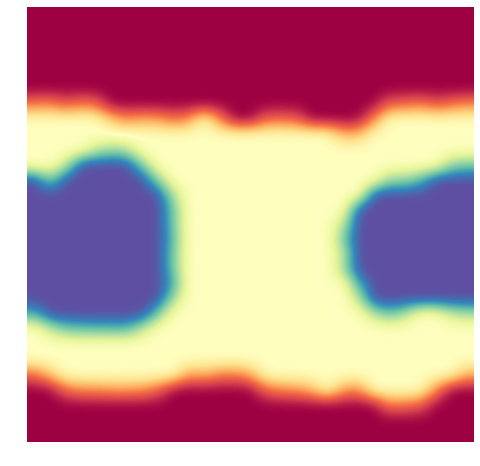

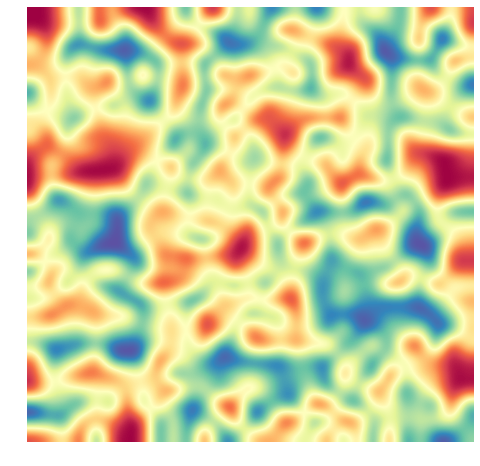

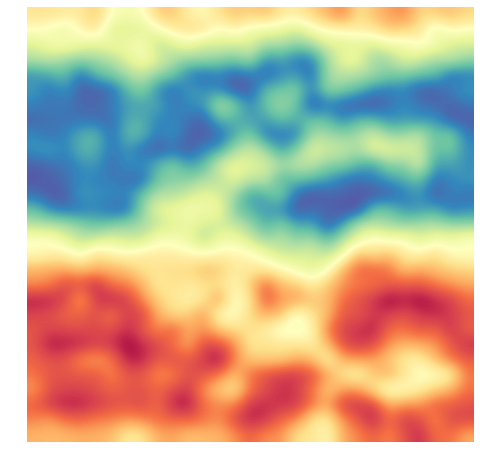

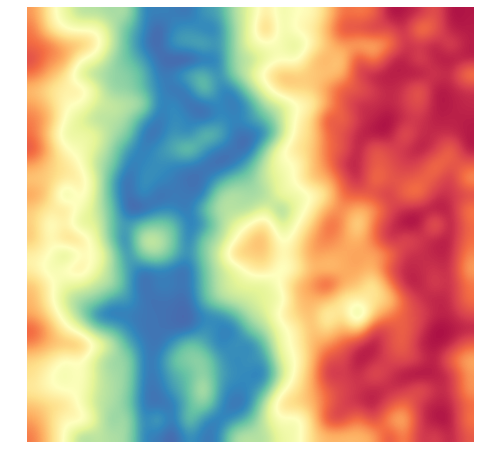

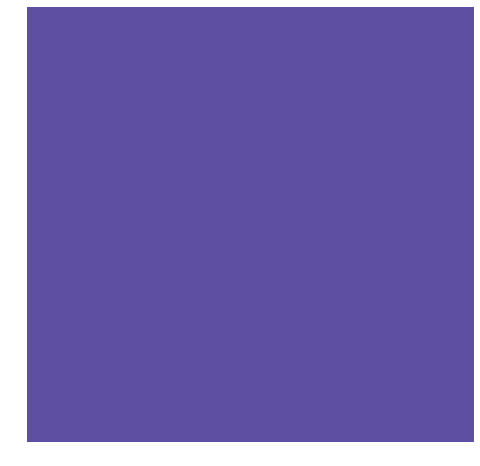

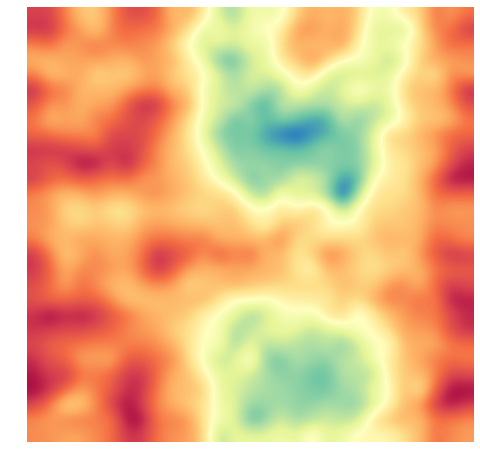

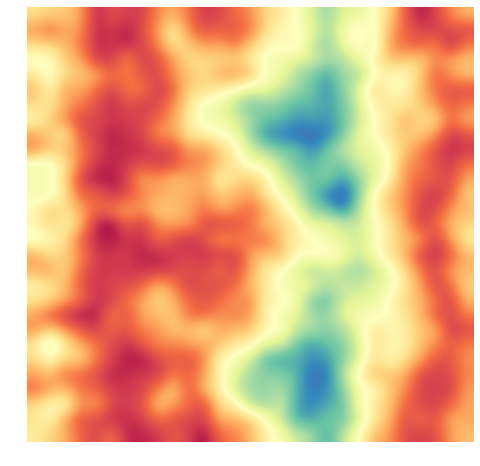

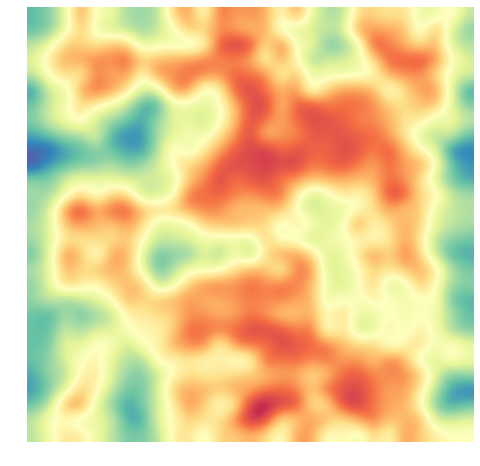

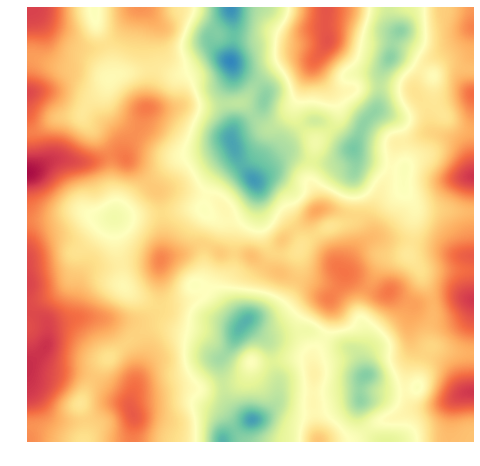

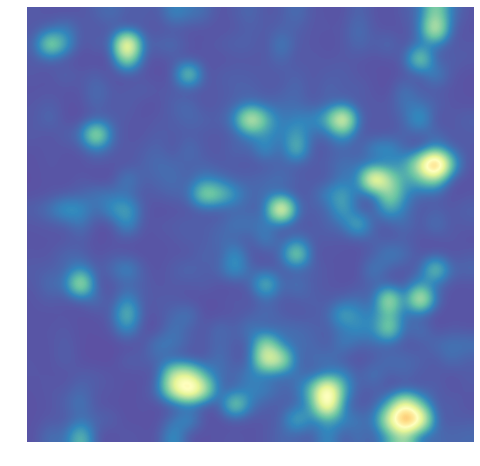

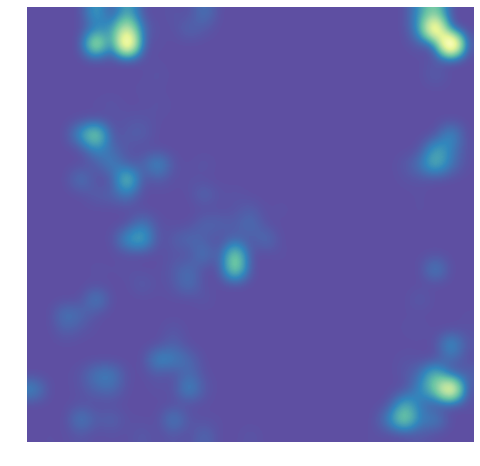

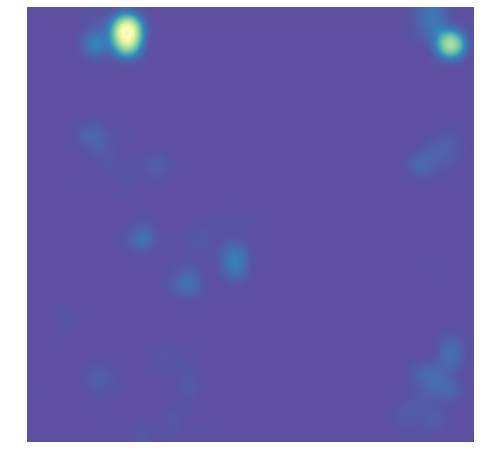

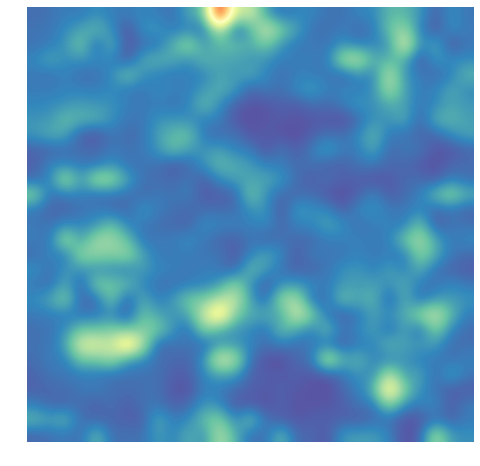

(<module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>,
 <module 'matplotlib.pyplot' from '/home/valyay/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>)

In [0]:
elbow_plot(specific_cluster)

algorithm = KMeans(n_clusters = 4)
som.cluster(algorithm=algorithm)
draw_umatrix()

In [0]:
print("asdasdasd")

In [0]:
labels = range(specific_cluster.shape[0])
clusters = find_clusters(labels)
quantization = quant_err(specific_cluster)
print(quantization)

{
    "0": [
        2570,
        2571,
        2572,
        2573,
        2574,
        2575,
        2576,
        2577,
        2578,
        2579,
        2580,
        2581,
        2582,
        2583,
        2584,
        2585,
        2586,
        2587,
        2588,
        2589,
        2590,
        2591,
        2592,
        2593,
        2594,
        2595,
        2596,
        2597,
        2598,
        2599,
        2600,
        2601,
        2602,
        2603,
        2604,
        2605,
        2606,
        2607,
        2608,
        2609,
        2610,
        2611,
        2612,
        2613,
        2614,
        2615,
        2616,
        2617,
        2618,
        2619,
        2620,
        2621,
        2622,
        2623,
        2624,
        2625,
        2626,
        2627,
        2628,
        2629,
        2630,
        2631,
        2632,
        2633,
        2634,
        2635,
        2636,
        2637,
        2638,
        2639,
       

0.9042089794236504


In [0]:
import jdc
import numpy as np
import itertools 


class SOM(object):
    
    
    def __init__(self,h,w,dim_feat):
        """
            Construction of a zero-filled SOM.
            h,w,dim_feat: constructs a (h,w,dim_feat) SOM.
        """
        self.shape = (h,w,dim_feat)
        self.som = np.zeros((h,w,dim_feat))

        # Training parameters
        self.L0 = 0.0
        self.lam = 0.0
        self.sigma0 = 0.0
    
    
    def train(self,data,L0,lam,sigma0,initializer=np.random.rand):
        """ 
            Training procedure for a SOM.
            data: a N*d matrix, N the number of examples, 
                  d the same as dim_feat=self.shape[2].
            L0,lam,sigma0: training parameters.
            initializer: a function taking h,w and dim_feat (*self.shape) as 
                         parameters and returning an initial (h,w,dim_feat) tensor.
        """
        self.L0 = L0
        self.lam = lam
        self.sigma0 = sigma0
        self.data = data
        self.som = initializer(*self.shape)
        bmu_list = []
        
        for t in itertools.count():
            if self.sigma(t) < 0.5:
                break
            i_data =  np.random.choice(range(len(data)))

            bmu = self.find_bmu(data[i_data])
            self.update_som(bmu,data[i_data],t)
            # check out
            bmu_list.append(bmu)
        return bmu_list
            
    
    def find_bmu(self, input_vec):
        """
            Find the BMU of a given input vector.
            input_vec: a d=dim_feat=self.shape[2] input vector.
        """
        list_bmu = []
        for y in range(self.shape[0]):
            for x in range(self.shape[1]):
                dist = np.linalg.norm((input_vec-self.som[y,x]))
                list_bmu.append(((y,x),dist))
        list_bmu.sort(key=lambda x: x[1])
        return list_bmu[0][0]
    
    
    def update_bmu(self,bmu,input_vector,t):
        """
            Update rule for the BMU.
            bmu: (y,x) BMU's coordinates.
            input_vector: current data vector.
            t: current time.
        """
        self.som[bmu] += self.L(t)*(input_vector-self.som[bmu])

        
    def L(self, t):
        """
            Learning rate formula.
            t: current time.
        """
        return self.L0*np.exp(-t/self.lam) 

    
    
    def update_som(self,bmu,input_vector,t):
        """ 
            Calls the update rule on each cell.
            bmu: (y,x) BMU's coordinates.
            input_vector: current data vector.
            t: current time.
        """
        for y in range(self.shape[0]):
            for x in range(self.shape[1]):
                dist_to_bmu = np.linalg.norm((np.array(bmu)-np.array((y,x))))
                self.update_cell((y,x),dist_to_bmu,input_vector,t)

                
    def update_cell(self,cell,dist_to_bmu,input_vector,t):
        """ 
            Computes the update rule on a cell.
            cell: (y,x) cell's coordinates.
            dist_to_bmu: L2 distance from cell to bmu.
            input_vector: current data vector.
            t: current time.
        """
        self.som[cell] += self.N(dist_to_bmu,t)*self.L(t)*(input_vector-self.som[cell])
        # My attempts
#         self.new_som.append(self.som[cell])

        
    def N(self,dist_to_bmu,t):
        """ 
            Computes the neighbouring penalty.
            dist_to_bmu: L2 distance to bmu.
            t: current time.
        """
        curr_sigma = self.sigma(t)
        return np.exp(-(dist_to_bmu**2)/(2*curr_sigma**2))

    
    def sigma(self, t):
        """
            Neighbouring radius formula.
            t: current time.
        """
        return self.sigma0*np.exp(-t/self.lam)
    
    
    def quantization_error(self):
        """ 
            Computes the quantization error of the SOM.
            It uses the data fed at last training.
        """
        bmu_dists = []
        for input_vector in self.data:
            bmu = self.find_bmu(input_vector)
            bmu_feat = self.som[bmu]
            bmu_dists.append(np.linalg.norm(input_vector-bmu_feat))
        return np.array(bmu_dists).mean()

In [0]:
som_square = SOM(40,40, 13)
train_som = som_square.train(X,L0=0.8,lam=1e2,sigma0=10)
bmu = train_som
mapp = som_square.som

In [0]:
print(mapp.quantization_error())

AttributeError: 'numpy.ndarray' object has no attribute 'quantization_error'

In [0]:
print(som_square.quantization_error())

0.4055960377532623


In [0]:
som_square = SOM(29,29, 13)
train_som = som_square.train(specific_cluster,L0=0.8,lam=1e2,sigma0=10)
bmu = train_som
mapp = som_square.som

In [0]:
print(som_square.quantization_error())

0.29963716197197615


In [0]:
som_square = SOM(40,40, 13)
train_som = som_square.train(specific_cluster,L0=0.8,lam=1e2,sigma0=10)
bmu = train_som
mapp = som_square.som
print(som_square.quantization_error())

0.2820734871115981
